In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.DataFrame()

for i in range(1,6):
    df_temp = pd.read_csv(f"Processed_Data/Credit_processed_{i}.csv")
    df = pd.concat([df,df_temp], ignore_index=True)
df

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284513,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0.0
284514,-0.732789,-0.055080,2.035030,-0.738589,0.868229,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0.0
284515,1.919565,-0.301254,-3.249640,-0.557828,2.630515,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0.0
284516,-0.240440,0.530483,0.702510,0.689799,-0.377961,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0.0


In [28]:
df_fraud = df[df["Class"]==1]
df_legit = df[df["Class"]==0]

split_index = int(0.7*len(df_fraud))
df_fraud_train = df_fraud.iloc[:split_index]
df_fraud_test = df_fraud.iloc[split_index:]

split_index = int(0.5*len(df_legit))
df_legit_train = df_legit.iloc[:split_index]
df_legit_test = df_legit.iloc[split_index:]

df_train = pd.concat([df_fraud_train,df_legit_train], ignore_index=True)
df_test = pd.concat([df_fraud_test,df_legit_test], ignore_index=True)

df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)


In [29]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
X_train = X_resampled
y_train = y_resampled

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train, y_train)

LogisticRegression()

In [31]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


y_pred_LG = LG.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_LG))
print(recall_score(y_test, y_pred_LG))

[[112682  29331]
 [     4    144]]
0.972972972972973


## Random Forest Classification

In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


y_pred_RF = RF.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_RF))
print(recall_score(y_test, y_pred_RF))

[[141920     93]
 [    33    115]]
0.777027027027027


## XGBoost Classifier

In [34]:
import xgboost as xgb

XGBoost = xgb.XGBClassifier()
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred_XGB = XGBoost.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_XGB))
print(recall_score(y_test, y_pred_XGB))

[[141310    703]
 [    27    121]]
0.8175675675675675


## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred_DTC = DTC_model.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_DTC))
print(recall_score(y_test, y_pred_DTC))

[[139767   2246]
 [    38    110]]
0.7432432432432432


## Artificial Neural Network

In [38]:
import tensorflow as tf
import keras as ks

#Initializing the ANN
ann = tf.keras.models.Sequential()

#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [39]:

#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#Training the ANN on the training set
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.3053
Epoch 2/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.1021
Epoch 3/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0857
Epoch 4/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0768
Epoch 5/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0705
Epoch 6/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0645
Epoch 7/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0596
Epoch 8/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0579
Epoch 9/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0543
Epoch 10/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0528
Epoch 11/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0517
Epoch 12/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0526
Epoch 13/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0497
Epoch 14/20
8877/8877 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0497
Epoch 15/20
887

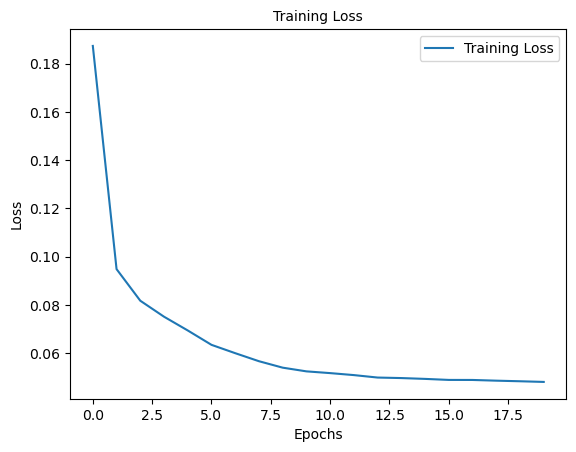

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Training Loss', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [41]:
y_proba = ann.predict(X_test)

# Convert to 0 or 1 using threshold
y_pred_ANN = (y_proba >= 0.5).astype(int).flatten()
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_ANN))
print(recall_score(y_test, y_pred_ANN))

4443/4443 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
[[137452   4561]
 [    20    128]]
0.8648648648648649


## ROC Curve

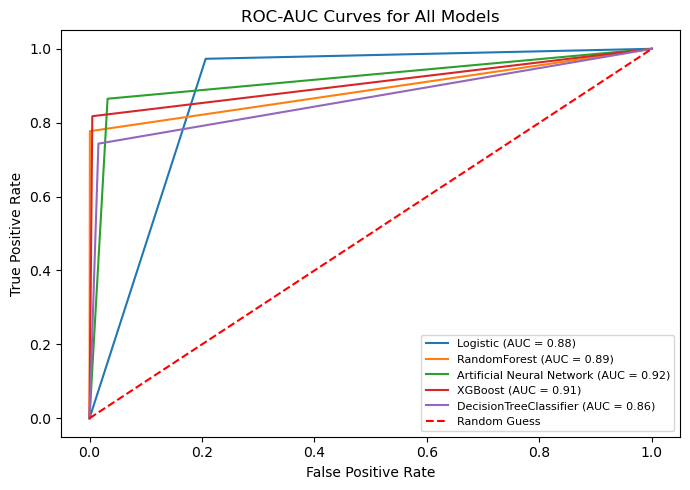

In [42]:
from sklearn.metrics import roc_curve, auc

test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_LG, 'RandomForest': y_pred_RF, 'Artificial Neural Network': y_pred_ANN, 'XGBoost': y_pred_XGB, 'DecisionTreeClassifier': y_pred_DTC})

plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'Artificial Neural Network', 'XGBoost', 'DecisionTreeClassifier']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.yticks(fontsize=10)
plt.title('ROC-AUC Curves for All Models', fontsize=12)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("ROC-AUC Curve for Processed Data.png")
plt.show()
